In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import json
import os

In [27]:
def createfig(nrows=2,figsize=(8,5),nraxs=2,hspace=0.6):
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(nrows=nrows, ncols=1, hspace=hspace)
    axs = [0]*nraxs
    
    for i in range(len(axs)):
        axs[i] = fig.add_subplot(gs[i])
    return fig,axs


def get_params_metrics(exp,folder='Flocking1111'):
    """
    Input: Name of the folder with the Experiment
    Returns: Parameter and Metric file 
    """
    basepath = f'../saves/{folder}/{exp}'
    
    with open(f'{basepath}/params.json') as paramfile:
        params = json.load(paramfile)

    with open(f'{basepath}/metrics.json') as metricfile:
        metrics = json.load(metricfile)
        
    return params,metrics

def plot_metric(ax,exp,folder='Flocking1111',metric='Average Hungarian Precision',color='Royalblue',title=True,legend=False,errors=True,label=None,yscale=True):
    p,m = get_params_metrics(exp,folder)
    
    x = np.arange(0,round(p['steps']/p['timestepsize']),p['sampling_rate']*p['timestepsize'])
    y = np.array(m[metric])
    
    ax.plot(x,y,label=label,color=color)
    ax.set_xlabel('Time')
    
    metric_error = metric.replace('Average','Var')
    
    if errors:
        error = 1*np.array(m[metric_error])
        ax.fill_between(x,y-error,y+error,alpha=0.5,color=color)
    
    if legend:
        ax.legend()
        
    if title:
        headerlong,header = get_header(exp)
        ax.set_title(header)
        
    if yscale:
        ax.set_ylim(0,1.1)
    
    return None

def get_header(exp):
    """
    Input: Folder Name of the Experiment
    Returns: The Title including the Experiment Parameters
    """
    s = exp.split('_')
    phase = s[0]
    obs_axis = s[1]
    nr_agents = s[2]
    nr_ensembles = s[3]
    obs_noise = s[4]
    shuffling = s[5]

    if obs_axis == '1100':
        obs_axis='Only Positions'
    elif obs_axis == '1101':
        obs_axis = 'Positions, Angles'
    elif obs_axis == '1110':
        obs_axis = 'Positions, Velocity'
    else:
        obs_axis = 'Positions, Velocity, Angles'

    if shuffling == 'True':
        shuffling = 'On'
    else:
        shuffling = 'Off'

    title = f"Phase: {phase}, Observed: {obs_axis}, \n Agents:{nr_agents}, Ensembles:{nr_ensembles},\n Obs. Noise:{obs_noise}, Shuffling:{shuffling}"
    noiseshort = np.round(float(obs_noise),decimals=5)
    titleshort = f"Phase: {phase}, Observed: {obs_axis}, \n Agents:{nr_agents}, Ensembles:{nr_ensembles},\n Obs. Noise:{noiseshort}, Shuffling:{shuffling}"
    
    return title,titleshort 

'''
def get_header(exp):
    """
    Input: Folder Name of the Experiment
    Returns: The Title including the Experiment Parameters
    """
    s = exp.split('_')
    obs_axis = s[0]
    nr_agents = s[1]
    nr_ensembles = s[2]
    obs_noise = s[3]
    sampling_rate = s[4]
    
    if obs_axis == '110':
        obs_axis='Only Positions'
    elif obs_axis == '111':
        obs_axis = 'Positions & Momenta'
    
    title = f"Observed: {obs_axis}, Agents:{nr_agents}, Ensembles:{nr_ensembles},\n Obs. Noise:{obs_noise}, Sampling Rate:{sampling_rate}"
    return title
'''


'\ndef get_header(exp):\n    """\n    Input: Folder Name of the Experiment\n    Returns: The Title including the Experiment Parameters\n    """\n    s = exp.split(\'_\')\n    obs_axis = s[0]\n    nr_agents = s[1]\n    nr_ensembles = s[2]\n    obs_noise = s[3]\n    sampling_rate = s[4]\n    \n    if obs_axis == \'110\':\n        obs_axis=\'Only Positions\'\n    elif obs_axis == \'111\':\n        obs_axis = \'Positions & Momenta\'\n    \n    title = f"Observed: {obs_axis}, Agents:{nr_agents}, Ensembles:{nr_ensembles},\n Obs. Noise:{obs_noise}, Sampling Rate:{sampling_rate}"\n    return title\n'

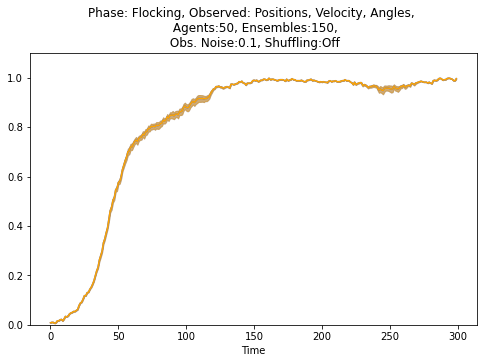

In [54]:
# Single Case Example for one Experiment

experiment = 'Flocking_1111_50_50_0.1_False'

fig,axs = createfig(nrows=1,nraxs=1)

#plot_metric(axs[0],experiment,color='darkred')
plot_metric(axs[0],experiment,metric='Average LPP')


experiment = 'Flocking_1111_50_150_0.1_False'
#plot_metric(axs[0],experiment,color='darkred')
plot_metric(axs[0],experiment,metric='Average LPP',color='orange')

In [29]:
def get_experiments(basepath='../saves/',folder='Flocking1111'):
    """
    Input: Path of the Saves Folder
    Output: A list of all Experiment names
    """
    path = f'{basepath}/{folder}'

    experiments = os.listdir(path)

    removes = ['Baseline','.DS_Store','animations','__MACOSX']

    for rem in removes:
        try:
            experiments.remove(rem)
        except:
            None
        
    return experiments

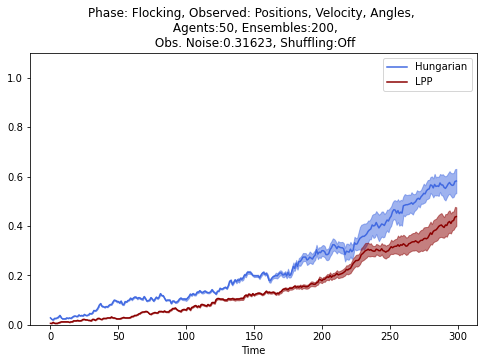

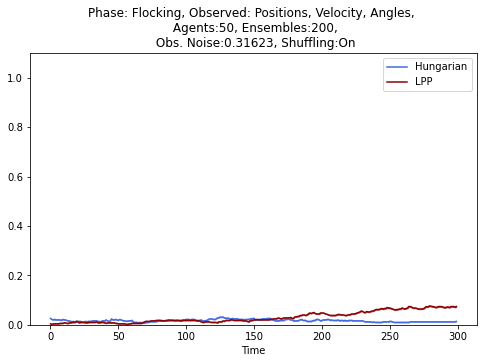

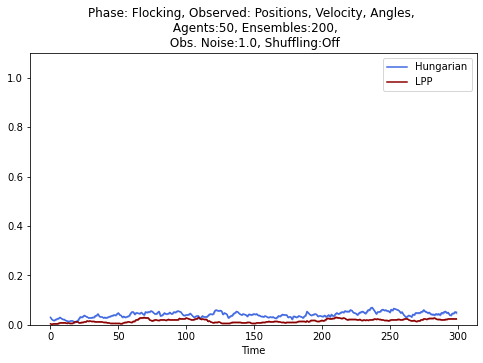

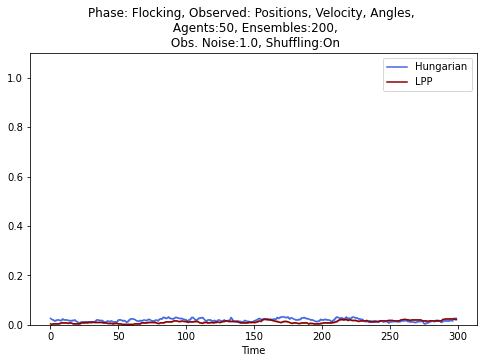

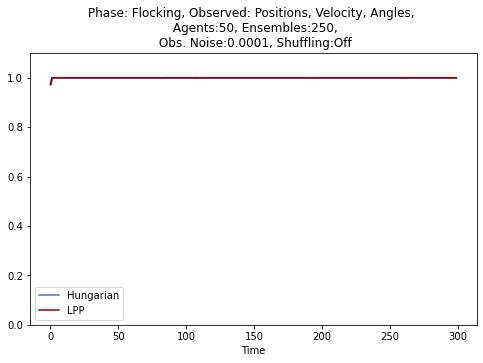

In [31]:
experiments = get_experiments('../saves/')

for exp in experiments[50:55]:
    
    fig,axs = createfig(nrows=1,nraxs=1)

    plot_metric(axs[0],exp,label='Hungarian',legend=True)
    plot_metric(axs[0],exp,metric='Average LPP',legend=True,color='darkred',label='LPP')
    del fig,axs

In [32]:
def get_avg_metric(experiment,metric='Average Hungarian Precision'):
    """
    Input: Experiment (folder name) and Metric (Hungarian or LPP)
    Output: Mean Precision starting at Timestep 176
    """
    p,m = get_params_metrics(experiment)
    
    x = np.arange(0,round(p['steps']/p['timestepsize']),p['sampling_rate']*p['timestepsize'])
    y = np.array(m[metric])
    avg_metric = np.mean(y[list(x).index(176):])
    
    return avg_metric

In [34]:
# The Parameter Ranges

test_observable_axis = [(True,True,True,True),(True,True,True,False),(True,True,False,False)]
test_ensembles = [50,100,150,200,250]
test_observation_noise = np.logspace(-4,0,9) #starts at 1e-4
test_shuffle = [True,False]

In [39]:
def get_M(phase='Flocking',agents='50',obs='1111',shuffle='False'):
    """
    Input: Number of Agents, Sampling Rate and Observed Axis
    Output: Matrix for Imshow. X-Axis: Ensemble Size, Y-Axis: Measurement Noise, Color: Mean Precision
    """
    
    M = np.zeros([len(test_observation_noise),len(test_ensembles)])

    for i,nr_ensemble in enumerate(test_ensembles):

        for j,noise in enumerate(test_observation_noise):
      
            exp = f"{phase}_{obs}_{agents}_{nr_ensemble}_{noise}_{shuffle}"    

            h = get_avg_metric(exp)
            M[len(test_observation_noise)-1-j,i] = h


    return M 

In [46]:
def plot_M(ax,axcb,M,agents='100',obs='110',shuffle='False'):
    """
    Input: Axis for plotting and for the colorbar, Matrix to be plotted
    """
    
    x1 = np.min(test_ensembles)-((test_ensembles[-1]-test_ensembles[-2])/2)
    x2 = np.max(test_ensembles)+((test_ensembles[-1]-test_ensembles[-2])/2)
    y1 = 1.125*np.log10(0.0001)
    y2 = 0.5
    
    show=ax.imshow(M,aspect='auto',cmap='RdBu',vmin=0,vmax=1,extent=(x1,x2,y1,y2))

    ax.set_xlabel('Kalman Ensemble Size')
    ax.set_xticks(test_ensembles)

    ax.set_ylabel('Observation Noise (Log10)')
    ax.set_yticks(np.log10(test_observation_noise[::2]))
    
    ax.set_title(f'Agents: {agents}, Shuffling: {shuffle}',size=10)


    axcb.axis('off')
    cbar = fig.colorbar(show,ax=axcb,orientation='vertical',location='right',fraction=1)
    cbar.set_ticks([0,0.25,0.5,0.75,1])
    cbar.set_label('Hungarian Precision',rotation=270,labelpad=12)
    return None

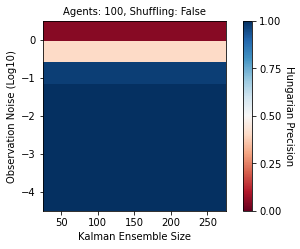

In [47]:
M = get_M()

fig = plt.figure(figsize=(4.4,3.5))
gs = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.15, width_ratios=[4,1])
axs = [0]*2
for i in range(len(axs)):
    axs[i] = fig.add_subplot(gs[i])

plot_M(axs[0],axs[1],M)

In [56]:
import analyze


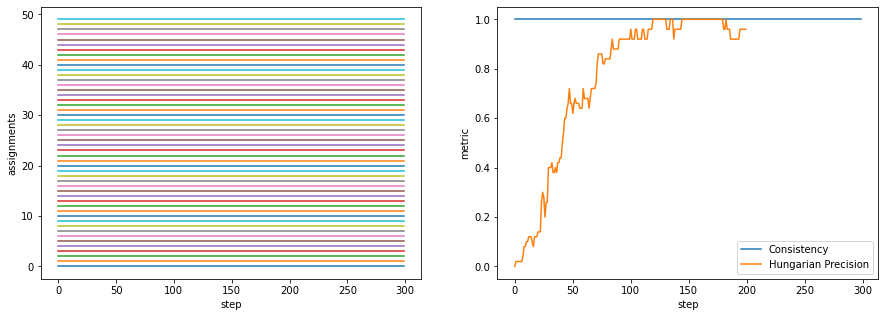

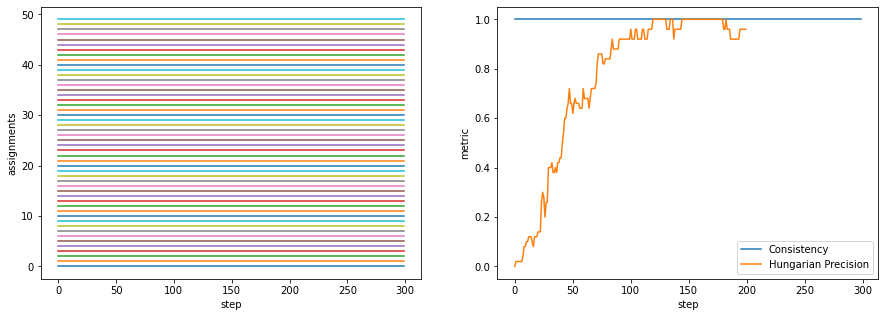

In [61]:
analyze.analyze_single_experiment('../saves/Flocking1111/Flocking_1111_50_50_0.1_False/')

analyze.analyze_single_experiment('../saves/Flocking1111/Flocking_1111_50_150_0.1_False/')